In [1]:
import numpy as np

import glob
from PIL import Image
import matplotlib.pyplot as plt

Monet image example:

JPEG
(256, 256)
RGB


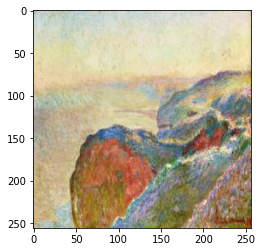

In [2]:
image = Image.open('monet_jpg/000c1e3bff.jpg')
print(image.format)
print(image.size)
print(image.mode)
plt.imshow(np.asarray(image))
#image.close()

Image array data:

In [3]:
npimage=np.asarray(image)
print(np.asarray(image).shape, np.asarray(image))

(256, 256, 3) [[[180 178 140]
  [193 191 153]
  [202 202 168]
  ...
  [215 205 180]
  [205 191 165]
  [193 179 152]]

 [[186 183 150]
  [190 190 156]
  [196 195 165]
  ...
  [218 206 182]
  [208 194 168]
  [196 182 155]]

 [[186 184 159]
  [185 185 159]
  [187 186 165]
  ...
  [224 212 188]
  [215 201 175]
  [204 190 163]]

 ...

 [[156 140 115]
  [191 177 151]
  [196 184 158]
  ...
  [155  89  31]
  [143  72  16]
  [137  64   9]]

 [[154 137 121]
  [196 180 164]
  [199 186 167]
  ...
  [138  95  26]
  [141  96  29]
  [131  83  17]]

 [[146 128 116]
  [184 168 153]
  [200 184 169]
  ...
  [115  86  10]
  [125  91  19]
  [118  84  12]]]


Load Monet images into 4D array.

In [2]:
x_monet = []
for file in glob.glob('monet_jpg/*.jpg'):
    image = Image.open(file)
    data = np.asarray(image)
    x_monet.append(data)
    image.close()
x_train_monet = np.array(x_monet)
del x_monet
x_train_monet.shape

(300, 256, 256, 3)

And regular photos:

In [3]:
x_photos = []
for file in glob.glob('photo_jpg/*.jpg'):
    image = Image.open(file)
    data = np.asarray(image)
    x_photos.append(data)
    image.close()
x_train_photos = np.array(x_photos)
del x_photos
x_train_photos.shape

(7038, 256, 256, 3)

Pull out 20% for test set array, and remove those from original array to yield train set:

In [4]:
test_monet_indices = np.random.choice(range(300), size=60, replace=False)
test_photo_indices = np.random.choice(range(7038), size=1408, replace=False)

x_test_monet = x_train_monet[test_monet_indices,:]
x_train_monet = np.delete(x_train_monet, test_monet_indices, axis=0)

x_test_photos = x_train_photos[test_photo_indices,:]
x_train_photos = np.delete(x_train_photos, test_photo_indices, axis=0)

print(x_test_monet.shape, x_train_monet.shape, x_test_photos.shape, x_train_photos.shape)

(60, 256, 256, 3) (240, 256, 256, 3) (1408, 256, 256, 3) (5630, 256, 256, 3)


Combine into x_train and x_test:

In [5]:
x_train = np.vstack((x_train_monet, x_train_photos))
x_test = np.vstack((x_test_monet, x_test_photos))
del x_train_monet, x_train_photos, x_test_monet, x_test_photos

print(x_train.shape, x_test.shape)

(5870, 256, 256, 3) (1468, 256, 256, 3)


Do the same for the labels (using # of entries from two cells up):

In [7]:
y_train = np.vstack((np.ones([240,1]), np.zeros([5630,1])))
y_test = np.vstack((np.ones([60,1]), np.zeros([1408,1])))

print(y_train.shape, y_test.shape)

(5870, 1) (1468, 1)


Normalize data:

In [8]:
x_train = x_train/255
x_test = x_test/255

Some Monet paintings from training set:

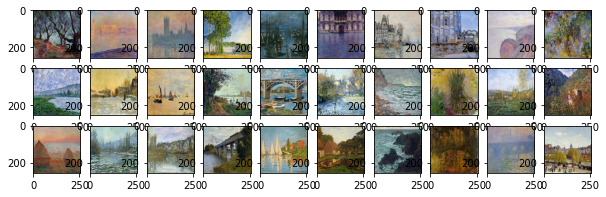

In [9]:
f, p = plt.subplots(3,10, figsize=(10,3))
for i in range(10):
    p[0][i].imshow(np.reshape(x_train[i], (256,256,3)))
    p[1][i].imshow(np.reshape(x_train[10+i], (256,256,3)))
    p[2][i].imshow(np.reshape(x_train[20+i], (256,256,3)))